# Face cluster with pirincipal component analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from skimage.io import imshow
from sklearn.decomposition import PCA

### Read data

In [46]:
def show_images(data, count=8):
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.imshow(data[i])   

(400, 64, 64)
[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


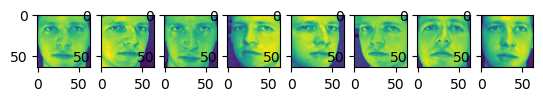

In [47]:
data = np.load('./data/face_cluster/olivetti_faces.npy')
print(data.shape)
print(data[0])
# fig, axes =plt.subplots(1, 8)
# for i, ax in enumerate(axes.flat):
    # ax.imshow(data[i + 100])
show_images(data, 8)    


### Reshape data

In [50]:
h = data.shape[1]
w = data.shape[2]
count = data.shape[0]
faces_data = data.reshape(count, h*w)
faces_data.shape


(400, 4096)

### Train model

In [61]:
n_components = 100

# use sklearn pca to reduce dimensionality
# def face_pca(faces, n_components):

pca = PCA(n_components=n_components)
pca.fit(faces_data)

print(pca.components_.shape)
eigen_faces = pca.components_.reshape(n_components, h, w)
print(eigen_faces.shape)
# show_images(eigen_faces)

faces_pca = pca.transform(faces_data)
print(faces_pca.shape)
print(faces_pca[0])
# show_images(faces_pca)



(100, 4096)
(100, 64, 64)
(400, 100)
[-6.4326143  -0.70366985 -1.4300222   1.2785382   2.5643954  -0.9506013
  2.081774   -2.9379332  -0.37392992  0.24310948 -1.3543113   1.1725671
  0.39207974  0.35820818  0.7542002   0.27037457  0.5147021  -0.5964235
 -0.1557972  -0.28312165  0.13553631  0.7360255  -0.1247232   0.4259382
  0.49943197 -0.5080123   0.7129092  -0.14959455 -0.02976047  0.5985754
 -0.51035684  0.3415672  -0.0897167   0.8146999   0.13533589 -0.18416917
 -0.31170368 -0.5694473  -0.3949785   0.5036053   0.2757757   0.18257749
  0.01814276  0.56337094 -0.478681    0.27850717 -0.30731922  0.27821803
  0.2538163   0.60168546  0.36610833 -0.10166824 -0.17847005  0.06766302
  0.08352912 -0.39290956  0.97144866  0.0394456  -0.09408356 -0.15156421
  0.35075116  0.7035052   0.20277233 -0.30988038 -0.03270528 -0.5201071
 -0.07959044 -0.4268185   0.3538826  -0.36768314 -0.03699466 -0.08504009
  0.6637779   0.4338997   0.2868123   0.4296293   0.04803713  0.08750996
 -0.1365036  -0.1357

### Handwrite model

In [68]:
# fit()
     
    # randomly pick data centers for the n samples
    # foeach data point, find the nearest data center
        # calculate the distance between the data point and the nearest data center
    # repick data centers
        # calculate the new data center by averaging the data point and the nearest data center

    # termination.
    #   1) hit max iteration 2) no data center change
class KMeans(object):
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.centers = None
        self.labels = None        
        self.max_iter = max_iter

    def fit(self, X):
        """
        K-means clustering algorithm.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        k : int. component count
        max_iter : int, default=100
        Returns
        -------
        labels : array-like, shape (n_samples,)
        centers : array-like, shape (k, n_features)
        """
        n_samples, n_features = X.shape
        self.centers = X[np.random.choice(n_samples, self.k, replace=False)]
        data_center_assignment = np.zeros(n_samples) # initialize data_center_assignment of data points to which data center belongs
        for i in range(self.max_iter):
            data_center_change = False
            for j in range(n_samples): # calculate the distance between each data point to all the data centers
                distances = np.linalg.norm(X[j] - self.centers, axis=1)
                min_index = np.argmin(distances)
                if data_center_assignment[j] != min_index:
                    data_center_assignment[j] = min_index
                    data_center_change = True
            if not data_center_change:
                break
            self.centers = np.mean(X[data_center_assignment == np.arange(self.k)], axis=0)

        return data_center_assignment, self.centers

model = KMeans(k=99)
r = model.fit(faces_data)
    

KeyboardInterrupt: 

### Predit on test dataset


### Output

In [1]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)